<a href="https://colab.research.google.com/github/shreyamadarapu/INFO_5731/blob/main/Madarapu_Shreya_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here

import csv
import nltk
from nltk import pos_tag, RegexpParser
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

#(1) Count the frequency of all the N-grams (N=3).

def read_csv(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        for row in csv_reader:
            data.append(row[0])
    return data

def generate_ngrams(text, n):
    ngrams = []
    words = text.split()
    for i in range(len(words) - n + 1):
        ngrams.append(' '.join(words[i:i+n]))
    return ngrams

def count_ngrams(data, n):
    ngram_counts = {}
    for text in data:
        ngrams = generate_ngrams(text, n)
        for ngram in ngrams:
            if ngram in ngram_counts:
                ngram_counts[ngram] += 1
            else:
                ngram_counts[ngram] = 1
    return ngram_counts

def main():
    file_path = 'movie_reviews.csv'
    data = read_csv(file_path)
    n = 3  # This can be changed to analyze different N-grams
    ngram_counts = count_ngrams(data, n)
    sorted_ngrams = sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)
    print(f"Top trigams and their frequency counts:")
    for ngram, count in sorted_ngrams[:10]:  # Printing top 10 N-grams
        print(f"{ngram}: {count}")

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Top trigams and their frequency counts:
a lot of: 219
and Ryan Gosling: 218
of the movie: 218
one of the: 176
the movie is: 175
the real world: 175
this movie was: 174
a movie that: 173
the real world.: 173
the point of: 132


In [ ]:
#(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

def read_csv(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        for row in csv_reader:
            data.append(row[0])
    return data

def generate_bigrams(text):
    bigrams = []
    words = text.split()
    for i in range(len(words) - 1):
        bigram = (words[i], words[i+1])
        bigrams.append(bigram)
    return bigrams

def count_bigrams(data):
    bigram_counts = {}
    word_counts = {}
    for text in data:
        bigrams = generate_bigrams(text)
        for bigram in bigrams:
            word_counts[bigram[0]] = word_counts.get(bigram[0], 0) + 1
            if bigram in bigram_counts:
                bigram_counts[bigram] += 1
            else:
                bigram_counts[bigram] = 1
    return bigram_counts, word_counts

def calculate_probabilities(bigram_counts, word_counts):
    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        word1 = bigram[1]
        word2 = bigram[0]
        bigram_probabilities[bigram] = count / word_counts[word2]
    return bigram_probabilities

def main():
    file_path = 'movie_reviews.csv'
    data = read_csv(file_path)
    bigram_counts, word_counts = count_bigrams(data)
    bigram_probabilities = calculate_probabilities(bigram_counts, word_counts)
    print("Bigram Probabilities:")
    for bigram, prob in bigram_probabilities.items():
        print(f"{bigram}: {prob}")

if __name__ == "__main__":
    main()

Bigram Probabilities:
('Margot', 'does'): 0.0722495894909688
('does', 'the'): 0.25142857142857145
('the', 'best'): 0.013653741125068269
('best', 'with'): 0.2009132420091324
('with', 'what'): 0.022928608650338717
('what', "she's"): 0.05301204819277108
("she's", 'given,'): 0.3384615384615385
('given,', 'but'): 1.0
('but', 'this'): 0.021536955457660302
('this', 'film'): 0.09534246575342466
('film', 'was'): 0.09529025191675794
('was', 'very'): 0.040670599192797266
('very', 'disappointing'): 0.09166666666666666
('disappointing', 'to'): 1.0
('to', 'me.'): 0.008366609621601065
('me.', 'It'): 0.5
('It', 'was'): 0.33384146341463417
('was', 'marketed'): 0.013660353927351754
('marketed', 'as'): 1.0
('as', 'a'): 0.22199488491048594
('a', 'fun,'): 0.006323656223052601
('fun,', 'quirky'): 0.2
('quirky', 'satire'): 0.5
('satire', 'with'): 0.5
('with', 'homages'): 0.022928608650338717
('homages', 'to'): 1.0
('to', 'other'): 0.008366609621601065
('other', 'movies.'): 0.16730038022813687
('movies.', 'It

In [ ]:
#(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.
# Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

import pandas as pd
from collections import Counter

def load_dataset(file_path):
    return pd.read_csv(file_path)

def calculate_word_probabilities(data):
    texts = data['Review'].tolist()

    # Flatten the list of words to calculate global frequencies
    all_words = [word for text in texts for word in text.split()]
    global_word_frequencies = Counter(all_words)
    max_global_frequency = max(global_word_frequencies.values())

    # Calculate word frequencies for each review
    review_word_frequencies = [Counter(review.split()) for review in texts]

    # Calculate relative probabilities
    relative_probabilities = []
    for review_freq in review_word_frequencies:
        review_probs = {word: (freq / global_word_frequencies[word]) / max_global_frequency for word, freq in review_freq.items()}
        relative_probabilities.append(review_probs)

    return relative_probabilities, list(global_word_frequencies.keys())

def create_probability_dataframe(relative_probabilities, columns, index):
    # Initialize DataFrame
    df = pd.DataFrame(0, index=index, columns=columns)

    # Populate DataFrame
    for i, review_probs in enumerate(relative_probabilities, start=1):
        for word, prob in review_probs.items():
            df.at[i, word] = prob

    return df

# Load the dataset
file_path = 'movie_reviews.csv'
dataset = load_dataset(file_path)

# Calculate word probabilities
relative_probabilities, words = calculate_word_probabilities(dataset)

# Create the probability table
probability_table = create_probability_dataframe(relative_probabilities, words, dataset.index + 1)

# The DataFrame 'probability_table' now holds the calculated relative probabilities
probability_table

,Margot,does,the,best,with,what,she's,"given,",but,this,...,defines,should,whoever,are.,laugh.,kinda,telling.,understand,Really,happy
1,1.281139e-07,2.229182e-07,6.087335e-08,3.562620e-07,1.626292e-07,9.400166e-08,6.001644e-07,0.000002,1.527584e-07,1.282543e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.562278e-07,4.458364e-07,2.982794e-07,3.562620e-07,2.846012e-07,3.760066e-07,0.000000e+00,0.000000,3.818961e-08,4.275144e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000e+00,0.000000e+00,6.696069e-08,0.000000e+00,0.000000e+00,9.400166e-08,0.000000e+00,0.000000,3.818961e-08,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000e+00,2.229182e-07,6.696069e-08,0.000000e+00,4.065731e-08,9.400166e-08,0.000000e+00,0.000000,7.637922e-08,4.275144e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000e+00,0.000000e+00,1.278340e-07,0.000000e+00,1.219719e-07,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.710058e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,1.281139e-07,0.000000e+00,6.696069e-08,3.562620e-07,1.626292e-07,0.000000e+00,0.000000e+00,0.000000,1.527584e-07,8.550288e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.000000e+00,0.000000e+00,3.652401e-08,0.000000e+00,4.065731e-08,0.000000e+00,0.000000e+00,0.000000,7.637922e-08,4.275144e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.000000e+00,4.458364e-07,1.034847e-07,0.000000e+00,0.000000e+00,1.880033e-07,0.000000e+00,0.000000,3.818961e-08,4.275144e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,2.562278e-07,0.000000e+00,1.217467e-07,0.000000e+00,1.626292e-07,2.820050e-07,0.000000e+00,0.000000,7.637922e-08,4.275144e-08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
# (1) To build the documents-terms weights (tf * idf) matrix.

import numpy as np
import math
import pandas as pd

# Function to calculate term frequencies in a single document
def calculate_tf(document):
    tf_dict = {}
    doc_terms = document.split()
    total_terms = len(doc_terms)

    for term in doc_terms:
        tf_dict[term] = tf_dict.get(term, 0) + 1 / total_terms

    return tf_dict

# Function to calculate document frequency for each term across all documents
def calculate_df(documents):
    df_dict = defaultdict(int)

    for document in documents:
        unique_terms = set(document.split())
        for term in unique_terms:
            df_dict[term] += 1

    return df_dict

# Function to calculate inverse document frequency for each term
def calculate_idf(df_dict, total_documents):
    idf_dict = {}

    for term, count in df_dict.items():
        idf_dict[term] = math.log(total_documents / count)

    return idf_dict

# Function to calculate TF-IDF for each document
def calculate_tfidf(documents):
    total_documents = len(documents)
    tf_list = [calculate_tf(doc) for doc in documents]
    df_dict = calculate_df(documents)
    idf_dict = calculate_idf(df_dict, total_documents)

    tfidf_matrix = []

    for tf_dict in tf_list:
        tfidf_scores = {}
        for term, tf_score in tf_dict.items():
            tfidf_scores[term] = tf_score * idf_dict.get(term, 0)
        tfidf_matrix.append(tfidf_scores)

    return tfidf_matrix, list(df_dict.keys())

# Load the dataset using pandas
data = pd.read_csv("movie_reviews.csv")
# Now you can access the 'Review' column
documents = data['Review'].tolist()

# Continue with your TF-IDF calculations
tfidf_matrix, terms = calculate_tfidf(documents)

# convert it into a more manageable structure and display a small part of it
# Convert TF-IDF matrix to a DataFrame for easier visualization
tfidf_df = pd.DataFrame(tfidf_matrix)

# Fill NaN values with 0, as they represent terms that do not appear in the document
tfidf_df = tfidf_df.fillna(0)
tfidf_df.head()

,Margot,does,the,best,with,what,she's,"given,",but,this,...,defines,should,whoever,are.,laugh.,kinda,telling.,understand,Really,happy
0,0.005781,0.009301,0.0,0.010546,0.010067,0.004501,0.016957,0.021691,0.002528,0.002901,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002812,0.004525,0.0,0.002565,0.004285,0.004380,0.000000,0.000000,0.000154,0.000235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.005540,0.000000,0.000000,0.000778,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.005535,0.0,0.000000,0.001498,0.002678,0.000000,0.000000,0.000752,0.000575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.000000,0.005080,0.000000,0.000000,0.000000,0.000000,0.002603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# (2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

import math
from collections import defaultdict
import pandas as pd

def tokenize(text):
    """
    This function splits text into lowercase words and removes punctuation.
    """
    text = text.lower()
    tokens = [word.strip() for word in text.split() if word.isalnum()]
    return tokens

def calculate_tf(words):
    """
    This function calculates term frequency (tf) for each word in the document.
    """
    tf = {}
    total_terms = len(words)

    for term in words:
        tf[term] = tf.get(term, 0) + 1 / total_terms

    return tf

def calculate_df(documents):
    """
    This function calculates document frequency for each term across all documents.
    """
    df_dict = defaultdict(int)

    for document in documents:
        for term in document:  # Iterate over the list of words in each document
            df_dict[term] += 1

    return df_dict

def calculate_idf(df_dict, total_documents):
    """
    This function calculates inverse document frequency for each term.
    """
    idf_dict = {}

    for term, count in df_dict.items():
        idf_dict[term] = math.log(total_documents / count)

    return idf_dict

def calculate_tfidf(documents):
    """
    This function calculates TF-IDF for each document.
    """
    total_documents = len(documents)
    tf_list = [calculate_tf(doc) for doc in documents]
    df_dict = calculate_df(documents)
    idf_dict = calculate_idf(df_dict, total_documents)

    tfidf_matrix = []

    for tf_dict in tf_list:
        tfidf_scores = {}
        for term, tf_score in tf_dict.items():
            tfidf_scores[term] = tf_score * idf_dict.get(term, 0)
        tfidf_matrix.append(tfidf_scores)

    return tfidf_matrix

def cosine_similarity(doc1, doc2):
    """
    This function calculates cosine similarity between two documents (TF-IDF vectors).
    """
    numerator = sum(weight1 * weight2 for weight1, weight2 in zip(doc1.values(), doc2.values()))
    denominator = math.sqrt(sum(weight**2 for weight in doc1.values())) * math.sqrt(sum(weight**2 for weight in doc2.values()))
    return numerator / denominator if denominator > 0 else 0

# Load and preprocess movie reviews
reviews = []
with open("movie_reviews.csv", "r") as file:
    for line in file:
        review = line.strip()
        reviews.append(tokenize(review))

# Define different queries (feel free to add more)
queries = [
    "funny comedy lighthearted story enjoyable characters",
]

# Function to rank documents for a given query
def rank_documents(query):
    """
    This function ranks documents based on cosine similarity to a given query.
    """
    query_vector = calculate_tf(tokenize(query))
    tfidf_matrix = calculate_tfidf(reviews)

    similarities = [cosine_similarity(query_vector, doc) for doc in tfidf_matrix]
    ranked_reviews = sorted(zip(reviews, similarities), key=lambda x: x[1], reverse=True)

    # Build DataFrame
    data = {'Reviews': [' '.join(review) for review, _ in ranked_reviews],
            'Cosine Similarity': [similarity for _, similarity in ranked_reviews]}
    df = pd.DataFrame(data)

    return df

# Run ranking for each query
for query in queries:
    result_df = rank_documents(query)
    print(result_df)

                                                Reviews  Cosine Similarity
0     watched this with my wife who was ready to tur...           0.083591
1     watched this with my wife who was ready to tur...           0.083591
2     watched this with my wife who was ready to tur...           0.083591
3     watched this with my wife who was ready to tur...           0.083591
4     watched this with my wife who was ready to tur...           0.083591
...                                                 ...                ...
1040  the and the writing of the movie is fun for a ...          -0.557081
1041  the and the writing of the movie is fun for a ...          -0.557081
1042  the and the writing of the movie is fun for a ...          -0.557081
1043  the and the writing of the movie is fun for a ...          -0.557081
1044  the and the writing of the movie is fun for a ...          -0.557081

[1045 rows x 2 columns]


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Write your code here
# (1) Train a 300-dimension word embedding (word2vec)

import pandas as pd
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Load the movie reviews dataset
file_path = 'movie_reviews.csv'
column_name = 'Review'
data = pd.read_csv(file_path)

# Preprocess the reviews
documents = data[column_name].map(simple_preprocess)

# Train a 300-dimensional Word2Vec model
model = Word2Vec(sentences=documents, vector_size=300, window=5, min_count=1, workers=4)

# Save the trained model
model.save("movie_reviews_word2vec.model")

print("Word2Vec model trained and saved successfully.")

Word2Vec model trained and saved successfully.


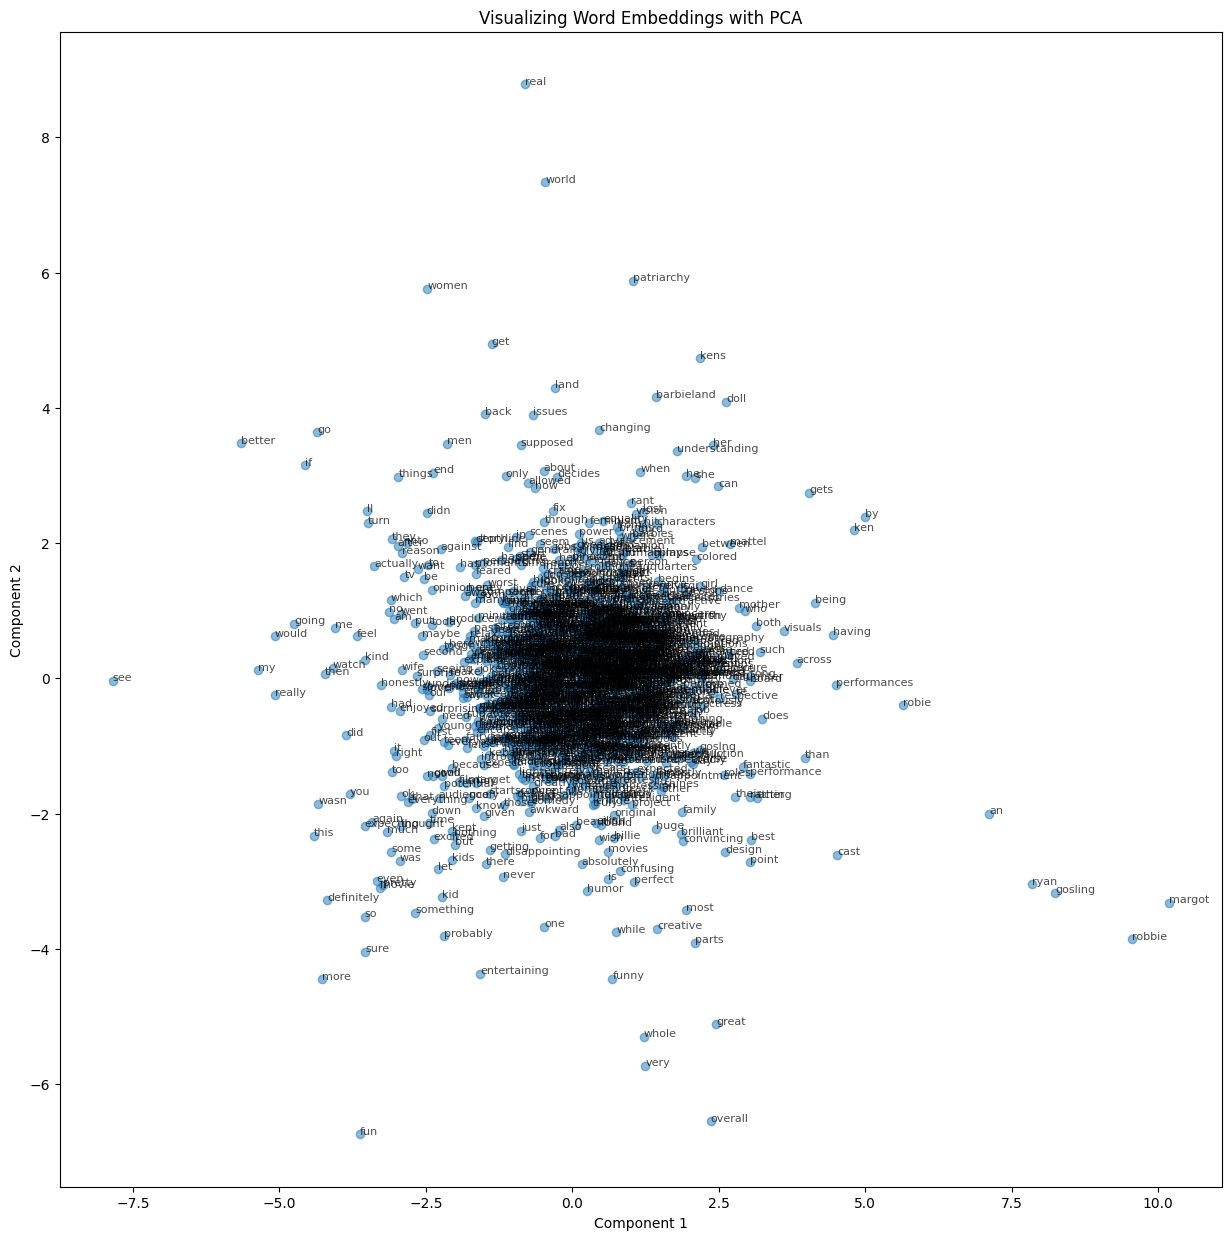

In [ ]:
# (2) Visualize the word embedding model you created.

import gensim.models as word2vec  # Import using 'as' for abbreviation
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the trained word2vec model
model = word2vec.Word2Vec.load("movie_reviews_word2vec.model")

# Extract word vectors and corresponding words
word_vectors = model.wv.vectors
words = list(model.wv.index_to_key)  # Access words using index_to_key

# Reduce dimensionality to 2 components using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(word_vectors)

# Create the scatter plot
plt.figure(figsize=(15, 15))  # Increase figure size for labels
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)

# Annotate data points with corresponding words
for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=8, alpha=0.7)

plt.title("Visualizing Word Embeddings with PCA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file

'''
https://github.com/shreyamadarapu/INFO_5731/blob/main/annotated_movie_reviews_sentiment.csv
'''

# Link:
'''
https://drive.google.com/file/d/1YSbmAZCt-RujHAyPa3M8D8kSDwN4_jhU/view?usp=sharing
'''


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
"""
Firstly regarding the time to complete assignment was manageable. I felt the 2(a) an 3rd where little easy compared to others as it provides an opportunity to apply various data science techniques like text processing, probability calculation and visualizations.
This assignment provides an invaluable opportunity to delve into the intricacies of N-grams, TF-IDF, and Document representation, along with the creation of a personalized word embedding model. Utilizing the gathered data, the task involves constructing a word embedding model using cutting-edge techniques such as Bert or word2vec, followed by data visualization. Additionally, it entails the creation of bespoke training and evaluation datasets for sentiment analysis.
Encountering several hurdles throughout the assignment, one notable challenge lies in Data annotation. The process of annotating data for sentiment analysis demands meticulous attention, as it necessitates an impartial assessment of sentiment categories. Furthermore, the subjective nature of sentiments, often contingent on context or nuances, complicates efforts to maintain objectivity.
Another formidable obstacle is Model training. Novices may find training their own word embedding or sentiment analysis model daunting due to insufficient technical expertise. Fine-tuning and properly training the model pose significant challenges. Moreover, pre-trained models may yield subpar performance on specific datasets due to inaccuracies in sentiment labeling or detection.
Despite these challenges, engaging in this assignment offers a rich learning experience. As a semi-real-world task, it enables practitioners to hone their skills in Natural Language Processing (NLP), sentiment analysis, and machine learning, enhancing their overall proficiency in data science. Delving into the supplied data also provides valuable Insights, uncovering patterns, trends, and sentiments. Analyzing user opinions, preferences, tendencies, and behavioral patterns can yield invaluable insights into user behavior and preferences.
"""

'\nFirstly regarding the time to complete assignment was manageable. I felt the 2(a) an 3rd where little easy compared to others as it provides an opportunity to apply various data science techniques like text processing, probability calculation and visualizations.\nThis assignment provides an invaluable opportunity to delve into the intricacies of N-grams, TF-IDF, and Document representation, along with the creation of a personalized word embedding model. Utilizing the gathered data, the task involves constructing a word embedding model using cutting-edge techniques such as Bert or word2vec, followed by data visualization. Additionally, it entails the creation of bespoke training and evaluation datasets for sentiment analysis.\nEncountering several hurdles throughout the assignment, one notable challenge lies in Data annotation. The process of annotating data for sentiment analysis demands meticulous attention, as it necessitates an impartial assessment of sentiment categories. Furthe